# 1.2: $d$-dimensional input Linear Regression


In [62]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.ion()

---------------- 
# Part 0: getting the data


In [63]:
def create_d_d_Data(N,thetas,D,sigmaNoise): 
    # Just to rescale the random values between [0,10)
    Xrange = 10
    
    # The data X is an array of dimensions NxD (50x(6+1)) of random values between [0, 10)
    X = np.random.random((N,D+1))*Xrange
    # Assignment of 1's to the first column
    X[:,0] = 1

    # We generate the values for the noise of dimensions (NxD) = (50x6)
    noise = np.random.normal(0,sigmaNoise, (N,D))
    
    # the "y" (ordinates axis) are y = a.x+b + noise
    y = X @ thetas + np.random.normal(0,sigmaNoise, (N,1))           # not available in real life
    return X, y


######### Data Creation #########
seed=42
np.random.seed(seed)
N = 50
D = 6
thetaGT = np.random.random((D+1,1))                                  # not available in real life
sigmaNoise = 0.5                                                     # not available in real life

# Training Data
X_Train, y_Train = create_d_d_Data(N,thetaGT,D,sigmaNoise)           # not available in real life

# Test Data
N_Test = N//2
X_Test, y_Test = create_d_d_Data(N_Test,thetaGT,D,sigmaNoise) 



In [64]:
X_Train.shape, y_Train.shape, X_Train[:, 1]

((50, 7),
 (50, 1),
 array([6.01115012, 1.8340451 , 2.92144649, 0.46450413, 3.04613769,
        9.09320402, 9.69584628, 1.95982862, 2.8093451 , 1.98715682,
        3.58465729, 3.25183322, 7.60785049, 1.07891427, 4.10382923,
        8.0812038 , 8.07440155, 8.60730583, 9.42909704, 2.51782296,
        0.51478751, 2.42055272, 6.33529711, 5.90892943, 6.90937738,
        8.77339353, 0.93102768, 8.9711026 , 6.0642906 , 6.91895198,
        6.49632899, 2.43989643, 5.76903885, 1.77110679, 4.28184148,
        3.16922005, 6.15007227, 7.02484084, 5.11342399, 3.37995157,
        2.86541252, 5.2224326 , 5.40635122, 2.70832251, 4.08952944,
        2.79933897, 3.55972679, 7.03657859, 3.98504734, 8.56489841]))

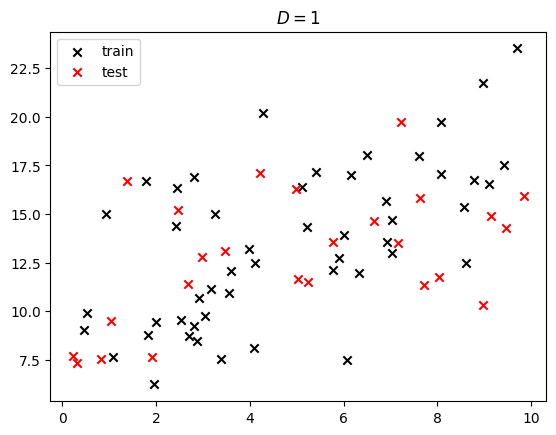

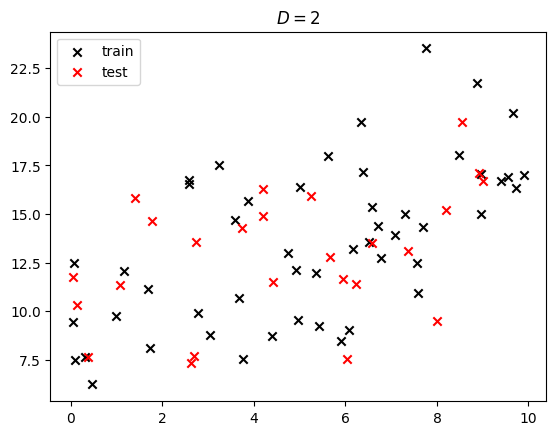

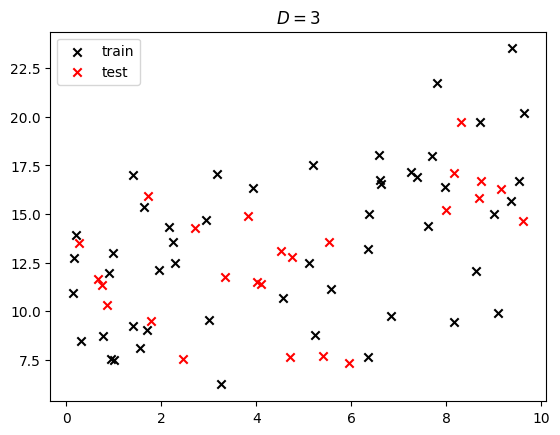

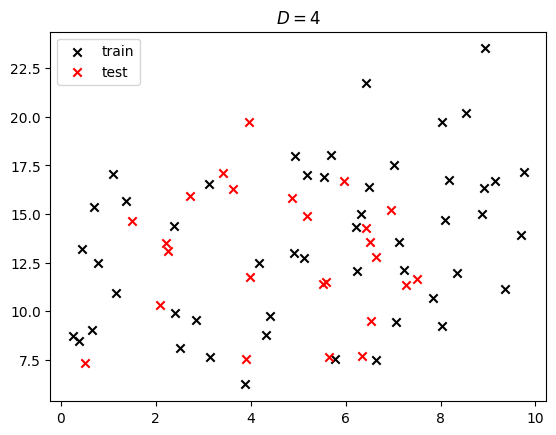

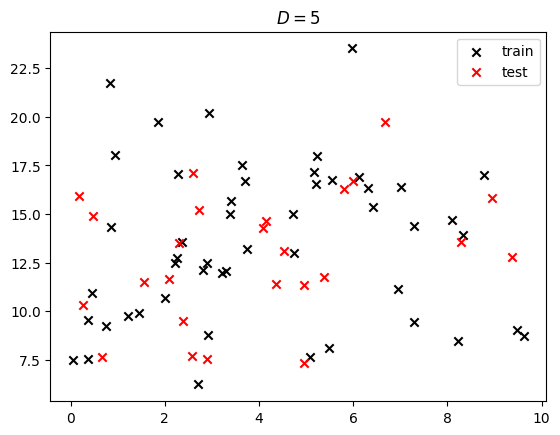

In [65]:
####### Data Visualization ###########
for d in range (1,D):
    plt.figure()
    plt.title('$D=$'+str(d))
    plt.scatter(X_Train[:,d], y_Train, label="train", marker='x',color='k')
    plt.scatter(X_Test[:,d], y_Test, label= "test", marker='x',color='red')
    plt.legend()

# Part 1: handcrafted model

## 1. Model defintion, initalization

- create a model, i.e. a function $f_\Theta(x)$
- choose hyper-parameters `eta`, `MaxIter`, and set the dimension of data `D` appropriately
- make a stupid or random guess for an initial value of the parameters vector `theta`, i.e. for `thetaInitial`

In [66]:
def model(X, theta):
    return X@theta

In [67]:
#### Hyper-parameters #####

# Learning rate
eta = 0.001

# Maximum of iterations
MaxIter = 10000

# Initialization
thetaInitial = np.random.random((D+1,1))

## 2. Update rule

### Now the crucial part 

- **take a piece of paper and a pencil, and derive the update rule for your function $f_\Theta(x)$**, according to the method of Grandient Descent. Really do it on paper, not on the computer !!
Use the Mean Squared Error Loss.

### Now to code it

- implement a function `fit(model, eta, MaxIter, D, theta, X, y)` that will update the parameters according to gradient descent
- run it !
- add a recording of train and test error to your fit function, so as to keep track of train and test error at all iterations of the algorithm
- since we have it, you may compare the ground truth parameters and your estimation of them

In [68]:
def fit(model, eta, MaxIter, D, theta, X_Train, y_Train):
    # Recording of training error
    trainError = np.zeros(MaxIter)
    
    # Recording of test error
    testError = np.zeros(MaxIter)
    for iteration in range(MaxIter):
        theta = theta - np.transpose(X_Train) @ ((2.0/N) * eta * (model(X_Train,theta) - y_Train))
        trainError[iteration] = np.mean((model(X_Train, theta)- y_Train)**2)
        testError[iteration] = np.mean((model(X_Test, theta)- y_Test)**2)
    return theta, trainError, testError


theta, trainError, testError = fit(model, eta, MaxIter, D, thetaInitial, X_Train, y_Train)

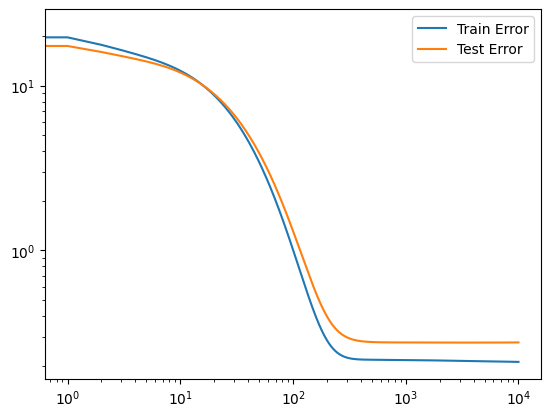

In [69]:
plt.loglog(trainError, label= "Train Error")
plt.loglog(testError, label= "Test Error")
plt.legend()

In [71]:
# Comparison of the optimal values of theta that we found vs the thetaGT (which is random so doesn't make much sense)
theta, thetaGT, theta / thetaGT, theta - thetaGT

(array([[0.45919855],
        [0.8955417 ],
        [0.77633882],
        [0.62688544],
        [0.14010386],
        [0.14398243],
        [0.06666567]]),
 array([[0.37454012],
        [0.95071431],
        [0.73199394],
        [0.59865848],
        [0.15601864],
        [0.15599452],
        [0.05808361]]),
 array([[1.22603301],
        [0.94196721],
        [1.06058093],
        [1.04715034],
        [0.89799435],
        [0.92299674],
        [1.1477535 ]]),
 array([[ 0.08465843],
        [-0.05517261],
        [ 0.04434487],
        [ 0.02822695],
        [-0.01591478],
        [-0.01201209],
        [ 0.00858206]]))